<a href="https://colab.research.google.com/github/hida0/ESAA/blob/HW/Week12_HW2_Ridge_Lasso_ElasticNet_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 개념 정리 & 필사
(파이썬 머신러닝 완벽가이드  ch5. 6-8 pg. 319-341)
## 1. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
### 1-1. 규제 선형 모델의 개요
- 좋은 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어해야 한다.
- 이전까지 선형 모델의 비용 함수는 RSS를 최소화하는, 즉 실제값과 예측값의 차이를 최소화하는 것만 고려했다. 그러다 보니 학습 데이터에 지나치게 맞추게 되고, 회귀 계수가 쉽게 커졌다. 이런 경우 변동성이 오히려 심해져서 테스트 데이터 세트에서 예측 성능이 저하되기 쉽다.
- 비용 함수는 학습 데이터의 **오류값을 최소로 하는 RSS 최소화 방법**과 **과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법**이 **서로 균형**을 이뤄야 한다.
- 비용 함수 목표 = $Min(RSS(W) + alpha * ||W||_2^2)$
- alpha는 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터로 값에 따라 다른 역할을 한다.
 - alpha = 0: 비용 함수 식은 기존과 동일한 $Min(RSS(W) + 0)$
 - alpha = 무한대: 비용 함수 식은 RSS(W)에 비해 $alpha * ||W||_2^2$가 너무 커지므로 **W 값을 0으로** 만들어야 Cost가 최소화되는 비용 함수 목표를 달성할 수 있다.
 - 즉  alpha 값을 작게 하면 회귀 계수 W 값이 커져도 어느 정도 상쇄가 가능하여 과적합을 개선할 수 있고, alpha 값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 하여 과적합을 개선할 수 있다.
 - alpha를 0에서부터 지속적으로 값을 증가시키면 회귀 계수 값의 크기를 감소시킬 수 있다.

- 비용 함수에 alpha 값으로 페널티를 부여하여 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제(Regularization)라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분된다.
 - L2 규제는 위에서 설명한 바와 같이 $alpha * ||W||_2^2$ 처럼 **W의 제곱에 대해 페널티를 부여하는 방식**을 말하며, **L2 규제를 적용한 회귀를 릿지 회귀**라고 
한다.
- L1 규제는 $alpha * ||W||_1 처럼$ **W의 절대값에 대해 페널티를 부여하는 방식**을 말하며, **L1 규제를 적용한 회귀를 라쏘 회귀**라고 한다. L1 규제를 적용하면 영향력이 크지 않은 회귀 계수 값을 0으로 변환한다.

### 2. 릿지(Ridge) 회귀
- 사이킷런의 **`Ridge`** 클래스를 이용하여 릿지 회귀를 구현한다.
- **`Ridge`** 클래스의 주요 생성 파라미터는 alpha이며, 이는 릿지 회귀의 alpha L2 규제 계수에 해당한다.
- 보스턴 주택 가격을 Ridge 클래스를 이용하여 다시 예측하고, 예측 성능을 `cross_val_score()`로 평가한다.
- 릿지의 5개 폴드 세트의 평균 RMSE가 5.518로, 규제가 없는 LinearRegression의 RMSE 평균인 5.829보다 더 뛰어난 예측 성능을 보인다.



In [ ]:
import pandas as pd

# boston 데이터 세트 로드
from sklearn.datasets import load_boston
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격이며 이를 PRICE 칼럼으로 DataFrame에 추가
bostonDF['PRICE'] = boston.target

In [ ]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

from sklearn.linear_model import Ridge
# alpha=10으로 설정하여 릿지 회귀를 수행
ridge = Ridge(alpha=10)

# cross_val_score()로 5개 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE를 구함
import numpy as np
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5) 
mse_scores = -1 * neg_mse_scores
rmse_scores = np.sqrt(mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores, 3))
print("5 folds의 개별 MSE scores:", np.round(mse_scores, 3))
print("5 folds의 개별 RMSE scores:", np.round(rmse_scores, 3))
print("5 folds의 평균 RMSE: {0:.3f}".format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 MSE scores: [11.422 24.294 28.144 74.599 28.517]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


### 2. 릿지(Ridge) 회귀
- 릿지의 alpha 값을 [0, 0.1, 1, 10, 100]으로 변화시키면서 RMSE와 회귀 계수 값의 변화를 살펴본다.
- alpha 값을 변화시키면서 RMSE 값과 각 피처의 회귀 계수를 시각화하고 DataFrame에 저장한다.
- 릿지 회귀는 **alpha 값이 커질수록 평균 RMSE가 좋아진다**.
- **alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아지며**, 특히 NOX 피처의 경우 alpha 값을 계속 증가시킴에 따라 회귀 계수가 크게 작아진다.


In [ ]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 RMSE를 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    # cross_val_score를 이용하여 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    mse_scores = -1 * neg_mse_scores
    rmse_scores = np.sqrt(mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("alpha {0} 일 때, 5 folds 의 평균 RMSE: {1:.3f}".format(alpha, avg_rmse))

alpha 0 일 때, 5 folds 의 평균 RMSE: 5.829
alpha 0.1 일 때, 5 folds 의 평균 RMSE: 5.788
alpha 1 일 때, 5 folds 의 평균 RMSE: 5.653
alpha 10 일 때, 5 folds 의 평균 RMSE: 5.518
alpha 100 일 때, 5 folds 의 평균 RMSE: 5.330


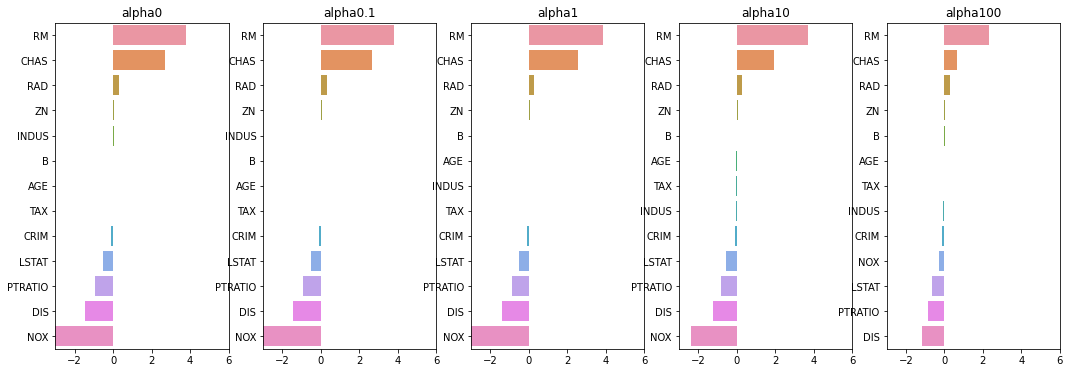

,alpha0,alpha0.1,alpha1,alpha10,alpha100
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
NOX,-17.766611,-16.684645,-10.777015,-2.371619,-0.262847
RM,3.809865,3.818233,3.854000,3.702272,2.334536
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
DIS,-1.475567,-1.459626,-1.372654,-1.248808,-1.153390
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 1행 5열로 된 맷플롯립 축을 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame을 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력하여 회귀 계수 값을 시각화 및 데이터 저장, pos는 axis의 위치를 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = "alpha"+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화하고 회귀 계수 값이 높은 순서로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

coeff_df

In [ ]:
ridge_alphas = [0, 0.1, 1, 10, 100]
coeff_df.sort_values(by='alpha0', ascending=False)

,alpha0,alpha0.1,alpha1,alpha10,alpha100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 3. 라쏘(Lasso) 회귀
- W의 절대값에 페널티를 부여하는 L1 규제를 선형 회귀에 적용한 것이다.
- **L1 규제**는 $alpha * ||W||_1$를 의미하며, **라쏘 회귀 비용 함수의 목표**는 **$RSS(W) + alpha * ||W||_1$을 최소화하는 W를 찾는 것**이다.
- L2 규제가 회귀 계수의 크기를 감소시키는 반면, L1 규제는 **불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거**한다. 이러한 측면에서 L1 규제는 적절한 피처만 회귀에 포함시키는 **피처 선택**의 특성을 가지고 있다.
- 사이킷런의 **`Lasso`** 클래스를 이용하여 라쏘 회귀를 구현한다.
-  **`Lasso`** 클래스의 주요 생성 파라미터는 alpha이며, 이는 라쏘 회귀의 alpha L1 규제 계수에 해당한다.
- Lasso 클래스를 이용하여 alpha 값을 변화시키면서 RMSE와 각 피처의 회귀 계수를 출력한다.
- RMSE와 각 피처의 회귀 계수를 출력하는 유틸리티 함수를 생성한다. get_linear_reg_eval( )는 인자로 회귀 모델의 이름, alpha값들의 리스트, 피처 데이터 세트와 타깃 데이터 세트를 입력 받아서 alpha 값에 따른 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환한다.


In [ ]:
from sklearn.linear_model import Lasso, ElasticNet
# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고, 회귀 계수 값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print("#######", model_name, "#######")
    for param in params:
        if model_name == "Ridge" : model = Ridge(alpha=param)
        elif model_name == "Lasso" : model = Lasso(alpha=param)
        elif model_name == "ElasticNet" : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        mse_scores = -1 * neg_mse_scores
        rmse_scores = np.sqrt(mse_scores)
        avg_rmse = np.mean(rmse_scores)
        print("alpha {0} 일 때, 5 folds 의 평균 RMSE: {1:.3f}".format(param, avg_rmse))

        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수를 추출
        model.fit(X_data, y_target)
        
        # alpha에 따른 피처별 회귀 계수를 Series로변환하고 이를 DataFrame의 칼럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = "alpha" + str(param)
        coeff_df[colname] = coeff

    return coeff_df

### 3. 라쏘(Lasso) 회귀
- 생성한 유틸리티 함수를 이용하여 alpha 값을 [0.07, 0.1, 0.5, 1, 3] 으로 변화시키면서 평균 RMSE와 그때의 회귀 계수들을 출력한다.
- get_linear_reg_eval()에 alpha값을 [0.07, 0.1, 0.5, 1, 3]로, 모델명을 "Lasso"로 입력하여 라쏘 모델 기반으로 수행한다.
- alpha가 0.07일 때 평균 RMSE이 가장 좋다.
- alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0이 된다. 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻는다.

In [ ]:
# 라쏘에 사용될 alpha 파라미터 값을 정의하고 get_linear_reg_eval() 함수를 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval("Lasso", params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha 0.07 일 때, 5 folds 의 평균 RMSE: 5.612
alpha 0.1 일 때, 5 folds 의 평균 RMSE: 5.615
alpha 0.5 일 때, 5 folds 의 평균 RMSE: 5.669
alpha 1 일 때, 5 folds 의 평균 RMSE: 5.776
alpha 3 일 때, 5 folds 의 평균 RMSE: 6.189


In [ ]:
# 반환된 coeff_lasso_df를 첫번째 칼럼순으로 내림차순 정렬하여 회귀 계수 DataFrame을 출력
sort_column = "alpha" + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


### 4. 엘라스틱넷(ElasticNet) 회귀
- 엘라스틱넷 회귀는 L1 규제와 L2 규제를 결합한 회귀로, 엘라스틱넷 회귀 비용 함수의 목표는 **$RSS(W) + alpha2 * ||W||_2^2 + alpha1 * ||W||_1$ 식을 최소화하는 W를 찾는 것**이다.
- 엘라스틱넷은 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 선택하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강하여 alpha 값에 따라 회귀 계수의 값이 급격하게 변동하는 것을 완화하기 위해, L2 규제를 라쏘 회귀에 추가한 것이다.
- L1 규제와 L2 규제가 결합되었기 때문에 수행 시간이 상대적으로 오래 걸린다는 단점이 있다.
- 사이킷런의 **`ElasticNet`** 클래스를 이용하여 엘라스틱넷 회귀를 구현한다.
- **`ElasticNet`** 클래스의 주요 생성 파라미터는 `alpha`와 `l1_ratio`이며, 이때의 alpha는 Ridge와 Lasso 클래스의 alpha 값과는 다르다.
- 엘라스틱넷의 규제는 a*L1 + b*L2로 정의될 수 있으며, a는 L1 규제의 alpha 값, b는 L2 규제의 alpha 값이다. 따라서 ElasticNet 클래스의 `alpha` 파라미터 값은 **a+b**이다.
- ElasticNet 클래스의 `l1_ratio` 파라미터 값은 **a/(a+b)**이다. l1_ratio가 0이면 a가 0이므로 L2 규제와 동일하고, l1_ratio가 1이면 b가 0이므로 L1 규제와 동일하다.

### 4. 엘라스틱넷(ElasticNet) 회귀
- ElasticNet 클래스를 이용하여 바로 이전의 릿지, 라쏘 회귀와 같이 엘라스틱넷 alpha 값을 변화시켜먼서 RMSE와 각 피처의 회귀 계수를 출력한다.
- 생성한 유틸리티 함수 get_linear_reg_eval( )를 이용한다. 이때 엘라스틱넷 모델을 선언할 때 l1_ratio를 0.7로 고정했는데, 이는 단순히 alpha 값의 변화만 살피기 위해서이다.
- alpha가 0.5일때, 평균 RMSE가 5.467로 가장 좋은 예측 성능을 보인다.
- alpha 값에 따른 피처들의 회귀 계수 값이 라쏘 회귀보다는 상대적으로 0이 되는 값이 적다는 것을 알 수 있다.

In [ ]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수를 호출
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval("ElasticNet", params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

####### ElasticNet #######
alpha 0.07 일 때, 5 folds 의 평균 RMSE: 5.542
alpha 0.1 일 때, 5 folds 의 평균 RMSE: 5.526
alpha 0.5 일 때, 5 folds 의 평균 RMSE: 5.467
alpha 1 일 때, 5 folds 의 평균 RMSE: 5.597
alpha 3 일 때, 5 folds 의 평균 RMSE: 6.068


In [ ]:
# 반환된 coeff_elastic_df를 첫번째 칼럼순으로 내림차순 정렬하여 회귀 계수 DataFrame을 출력
sort_column = "alpha" + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


### 5. 선형 회귀 모델을 위한 데이터 변환
- 선형 회귀 모델과 같은 선형 모델은 일반적으로 **피처와 타겟값 간의 선형 관계가 있다**고 가정하고, 이러한 최적의 선형함수를 찾아내 결과값을 예측한다.
- 선형 회귀 모델은 **피처값과 타겟값의 분포가 정규 분포의 형태**를 매우 선호한다. 특히 **타겟값**의 경우 정규 분포가 아닌 특정값의 분포가 치우친 **왜곡된 형태의 분포도**일 경우 **예측 성능에 부정적인 영향**을 미칠 가능성이 높다. 정도는 덜하지만 피처값도 마찬가지다.
- 따라서 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 **스케일링**과 **정규화** 작업을 수행하는 것이 일반적이다.
- 스케일링/정규화 작업을 선행한다고 해서 무조건 예측 성능이 향상되는 것은 아니며, 일반적으로 중요 피처들이나 타겟값의 분포도가 심하게 왜곡되었을 경우에 이러한 변환 작업을 수행한다.
- 피처 데이터 세트와 타겟 데이터 세트에 스케일링/정규화 작업을 수행하는 방법이 조금 다르다.

- 사이킷런을 이용한 피처 데이터 세트 변환
 1. **`StandardScaler`** 클래스를 이용하여 평균이 0이고 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나, **`MinMaxScaler`** 클래스를 이용하여 최솟값이 0이고 최댓값이 1인 값으로 정규화를 수행한다.
 2. 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법이다. 보통 1번 방법을 통해 예측 성능의 향상이 없을 경우 이와 같은 방법을 적용한다.
 3. 원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포된다. 이러한 변환을 **로그 변환**이라고 하며 1,2번 방법보다 훨씬 많이 사용되는 변환 방법이다.

- 타겟값의 경우는 일반적으로 **로그 변환**을 적용한다. 결정값을 정규 분포나 다른 정규값으로 변환하면 변환된 값을 최종적으로 다시 원본 타겟값으로 변환하기 어려울 수 있다.


### 5. 선형 회귀 모델을 위한 데이터 변환
- 보스턴 주택가격 피처 데이터 세트에 표준 정규 분포 변환, 최댓값/최솟값 정규화, 로그 변환을 차례로 적용한 후에 RMSE로 각 경우별 예측 성능을 측정한다.
- 이를 위한 유틸리티 함수 get_scaled_data( ) 함수를 생성한다. 
 - 이 함수는 method 인자로 변환 방법을 결정하며 **표준 정규 분포 변환(Standard)**, **최댓값/최솟값 정규화(MinMax)**, **로그 변환(Log)** 중에 하나를 선택한다. 
 - 로그 변환인 경우 np.log( )가 아닌 np.log1p( )를 사용하여, log( ) 함수를 적용할 때  언더 플로우의 발생을 방지하여 1+log( ) 함수를 적용하는 효과를 가진다.
 - p_degree는 다항식 특성을 추가할 때 다항식 차수가 입력되며, 다항식 차수는 2를 넘기지 않는다.

- `Ridge` 클래스의 alpha 값을 변화시키면서 피처 데이터 세트를 여러 가지 방법으로 변환한 데이터 세트를 입력 받을 경우 RMSE 값이 어떻게 변하는지 알아본다. 이를 위해서는 생성한 유틸리티 함수 get_linear_reg_eval( ) 함수를 이용한다.
- 피처 데이터 구성은 원본 1가지와 변환 5가지이다. 
 1. (None, None) : 아무런 변환을 하지 않은 원본 데이터
 2. ("Standard", None) : 표준 정규 분포 변환
 3. ("Standard", 2) : 표준 정규 분포를 다시 2차 다항식 변환
 4. ("MinMax", None) : 최솟값/최댓값 정규화 변환
 5. ("MinMax", 2) : 최솟값/최댓값 정규화를 다시 2차 다항식 변환
 6. ("Log", None) : 로그 변환

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그 변환(Log) 중 하나로 결정
# p_degree는 다항식 특성을 추가할 때 적용하며, 2 이상 부여하지 않음
def get_scaled_data(method="None", p_degree=None, input_data=None):
    if method == "Standard":
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == "MinMax":
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == "Log":
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [ ]:
# Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE를 추출
ridge_alphas = [0.1, 1, 10, 100]

# 원본 1개와 5개의 방식으로 변환
scale_methods = [(None, None), ("Standard", None), ("Standard", 2), ("MinMax", None), ("MinMax", 2), ("Log", None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print("\n## 변환 유형: {0}, Polynomial Degree: {1}".format(scale_method[0], scale_method[1]))
    get_linear_reg_eval("Ridge", params=ridge_alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False)


## 변환 유형: None, Polynomial Degree: None
alpha 0.1 일 때, 5 folds 의 평균 RMSE: 5.788
alpha 1 일 때, 5 folds 의 평균 RMSE: 5.653
alpha 10 일 때, 5 folds 의 평균 RMSE: 5.518
alpha 100 일 때, 5 folds 의 평균 RMSE: 5.330

## 변환 유형: Standard, Polynomial Degree: None
alpha 0.1 일 때, 5 folds 의 평균 RMSE: 5.826
alpha 1 일 때, 5 folds 의 평균 RMSE: 5.803
alpha 10 일 때, 5 folds 의 평균 RMSE: 5.637
alpha 100 일 때, 5 folds 의 평균 RMSE: 5.421

## 변환 유형: Standard, Polynomial Degree: 2
alpha 0.1 일 때, 5 folds 의 평균 RMSE: 8.827
alpha 1 일 때, 5 folds 의 평균 RMSE: 6.871
alpha 10 일 때, 5 folds 의 평균 RMSE: 5.485
alpha 100 일 때, 5 folds 의 평균 RMSE: 4.634

## 변환 유형: MinMax, Polynomial Degree: None
alpha 0.1 일 때, 5 folds 의 평균 RMSE: 5.764
alpha 1 일 때, 5 folds 의 평균 RMSE: 5.465
alpha 10 일 때, 5 folds 의 평균 RMSE: 5.754
alpha 100 일 때, 5 folds 의 평균 RMSE: 7.635

## 변환 유형: MinMax, Polynomial Degree: 2
alpha 0.1 일 때, 5 folds 의 평균 RMSE: 5.298
alpha 1 일 때, 5 folds 의 평균 RMSE: 4.323
alpha 10 일 때, 5 folds 의 평균 RMSE: 5.185
alpha 100 일 때, 5 folds 의 평균 RMSE: 6.538

## 

### 6. 로지스틱 회귀(Logistic Regression)
- 로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘이다.
- 로지스틱 회귀와 선형 회귀의 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드(Sigmoid) 함수 최적선을 찾고, 이 **시그모이드 함수의 반환 값을 확률로 간주**하여 **확률에 따라 분류를 결정**한다.
- 시그모이드 함수의 정의는 $y = \frac{1}{1+e^{-x}}$ 이다. 
- 시그모이드 함수는 x 값이 +, -로 아무리 커지거나 작아져도 y 값은 항상 0과 1 사이의 값을 반환한다. y 값은 x 값이 커지면 1에 , x 값이 작아지면 0에 근사하고 x 값이 0일 때는 0.5이다. 
- 회귀 문제를 약간 비틀어서 분류 문제에 적용한다. 예를 들어 악성 종양인지(Yes=1), 그렇지 않은지(No=0)를 회귀를 이용하여 1과 0의 값으로 예측하는 것이다.
-  종양 크기를 X축, 악성 종양 여부를 Y축으로 하여 S자 커브 형태의 시그모이드 함수를 이용하면 선형 회귀 선을 그릴 때보다 좀 더 정확하게 0과 1에 대해 분류를 할 수 있다.




## 6. 로지스틱 회귀(Logistic Regression)
### 6-1. 위스콘신 유방암 데이터 세트를 이용한 로지스틱 회귀
- 위스콘신 유방암 데이터 세트를 이용하여 로지스틱 회귀로 암 여부를 판단하는 실습을 수행한다.
- 사이킷런의 `load_breast_cancer( )`를 호출하여 전체 데이터 세트를 생성한다.
- 선형 회귀 계열의 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능의 영향을 받을 수 있으므로, 데이터에 먼저 정규 분포 형태의 표준 스케일링을 적용한 뒤에 `train_test_split( )`을 이용하여 데이터 세트를 학습 데이터 세트와 테스트 데이터 세트로 나눈다.
- 로지스틱 회귀는 사이킷런의 **`LogisticRegression`**을 이용한다.

In [ ]:
# 데이터 로드
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# StandardScaler( )로 평균이 0이고 분산이 1인 데이터 분포도 변환
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [ ]:
# 로지스틱 회귀를 이용하여 학습 및 예측 수행
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도와 roc_auc 측정
from sklearn.metrics import accuracy_score, roc_auc_score
print("accuracy: {0:.3f}".format(accuracy_score(y_test, lr_preds)))
print("roc_auc: {0:.3f}".format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


## 6. 로지스틱 회귀(Logistic Regression)
### 6-1. 위스콘신 유방암 데이터 세트를 이용한 로지스틱 회귀
- 사이킷런 `LogisticRegression` 클래스의 주요 하이퍼 파라미터로 `penalty`와 `C`가 있다. 
 - `penalty`는 규제의 유형을 설정하며, **"l2"**로 설정시 L2 규제를, **"l1"**로 설정시 L1 규제를 의미하고 기본은 "l2"이다.
 - `C`는 규제 강도를 조절하는 alpha 값의 역수이다. 즉 $C=\frac{1}{alpha}$이다. C값이 작을수록 규제 강도가 크다.
- **`GridSearchCV`**를 이용하여 위스콘신 유방암 데이터 세트에서 이 하이퍼 파라미터를 최적화한다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = { "penalty": ["l2", "l1"], 
          "C": [0.01, 0.1, 1, 1, 5, 10] }

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring="accuracy", cv=3)
grid_clf.fit(data_scaled, cancer.target)

In [ ]:
print("최적 하이퍼 파라미터: {0}, 최적 평균 정확도: {1:.3f}".format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터: {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도: 0.975


### 7. 회귀 트리
- 선형 회귀는 회귀 계수의 관계를 모두 선형으로 가정하고, 회귀 계수를 선형으로 결합하는 회귀 함수를 구하여 여기에 독립 변수를 입력하여 결과값을 예측하는 것이다.
- 비선형 회귀 역시 비선형 회귀 함수를 통해 결과값을 예측하는데, 회귀 계수를 비선형으로 결합하는 회귀 함수를 사용한다.
- 트리 기반의 회귀는 회귀 트리를 이용한다. 즉 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 진행한다. 
- 회귀 트리는 분류에서 언급한 분류 트리와 크게 다르지 않은데, 리프 노드에서 예측 결정값을 만드는 과정의 차이가 있다. 분류 트리가 특정 클래스 레이블을 결정하는 것과는 달리 회귀 트리는 **리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산**한다.
- 회귀 트리는 다음과 같이 동작한다. 
 1. 데이터 세트의 X 피처를 결정 트리 기반으로 분할하면 X값의 균일도를 반영한 지니 계수에 따라 다음 그림의 왼쪽과 같이 분할 할 수 있다. 루프 노드를 split 0 기준으로 분할하고 이렇게 분할된 규칙 노드에서 다시 split 1 과 split 2 규칙 노드로 분할할 수 있다. 
 2. 그리고 split 2는 다시 재귀적으로 split 3 규칙 노드로 다음 그림의 오른쪽과 같이 트리 규칙으로 변환한다. 
 3. 리프 노드 생성 기준에 부합하는 트리 분할이 완료됐다면 **리프 노드에 소속된 데이터 값의 평균값**을 구해서 **최종적으로 리프 노드에 결정값으로 할당**한다.


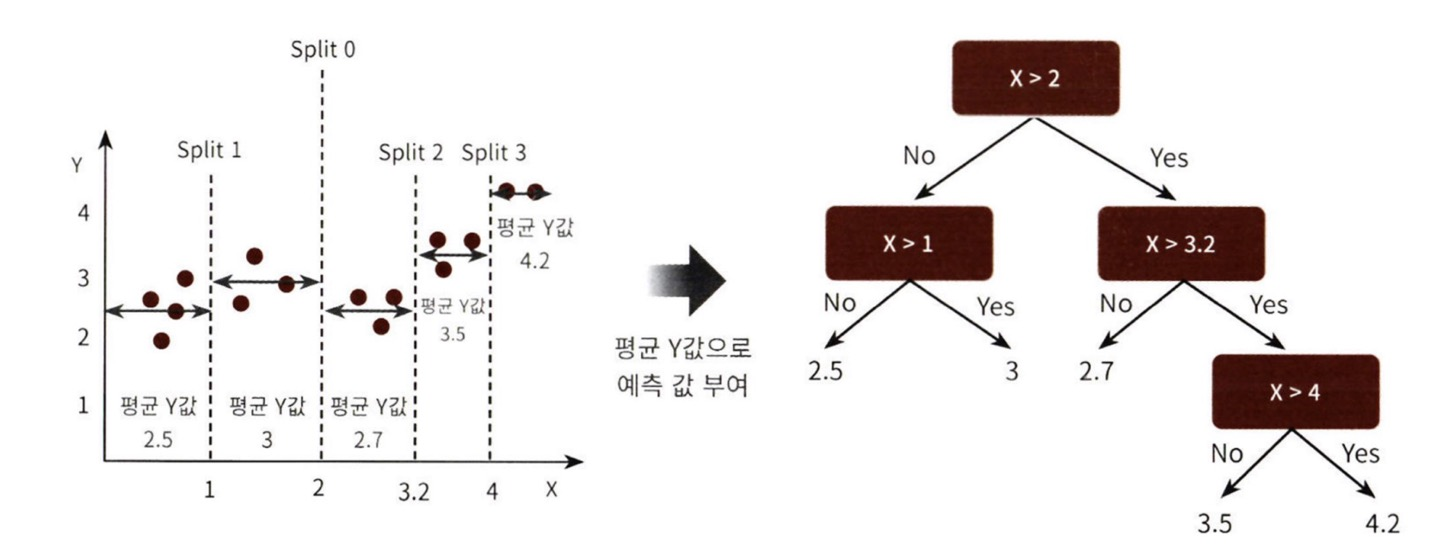

### 7. 회귀 트리
- 회귀는 **결정 트리, 랜덤 포레스트, GBM, XGBoost, LightGBM** 등의 분류에서 소개한 모든 트리 기반의 알고리즘이 가능하다.
- 트리 생성이 CART 알고리즘에 기반하고 있기 때문인데, CART(Classification And Regression Trees)는 이름에서도 알 수 있듯이 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘이다.
- 사이킷런은 결정 트리, 랜덤 포레스트, GBM에서 CART 기반의 회귀 수행을 할 수 있는 Estimator 클래스를 제공한다. 또한XGBoost, LigthGBM도 사이킷런 래퍼 클래스를 통해 이를 제공한다.


| 알고리즘 | 회귀 Estimator 클래스 | 분류 Estimator 클래스 | 
|:--- | :--- | :--- | 
| Decision Tree |  DecisionTreeRegressor | DecisionTreeClassifier | 
| Random Forest | RandomForestRegressor | RandomForestClassifier |
| Gradient Boosting |  GradientBoostingRegressor | GradientBoostingClassifier | 
| XGBoost |  XGBRegressor | XGBClassifier | 
| LightGBM |  LGBMRegressor | LGBMClassifier | 

- 사이킷런의 랜덤 포레스트 회귀 트리인 **`RandomForestRegressor`**를 이용하여 보스턴 주택 가격 예측을 수행한다.

In [ ]:
# 보스턴 데이터 세트 로드
from sklearn.datasets import load_boston
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF["PRICE"] = boston.target
y_target = bostonDF["PRICE"]
X_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)

# 랜덤 포레스트 회귀 트리를 이용하여 MSE 및 RMSE 측정
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, n_estimators=100)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
mse_scores = -1 * neg_mse_scores
rmse_scores = np.sqrt(mse_scores)
avg_rmse = np.mean(rmse_scores)

In [ ]:
print("5 교차 검증의 개별 Negative MSE scores: ", np.round(neg_mse_scores, 2))
print("5 교차 검증의 개별 MSE scores: ", np.round(mse_scores, 2))
print("5 교차 검증의 개별 RMSE scores: ", np.round(rmse_scores, 2))
print("5 교차 검증의 평균 RMSE: {0:.3f}".format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores:  [ -8.04 -13.58 -18.16 -47.62 -20.45]
5 교차 검증의 개별 MSE scores:  [ 8.04 13.58 18.16 47.62 20.45]
5 교차 검증의 개별 RMSE scores:  [2.84 3.68 4.26 6.9  4.52]
5 교차 검증의 평균 RMSE: 4.441


### 7. 회귀 트리
- 랜덤 포레스트 뿐만 아니라 결정 트리, GBM, XGBoost, LightGBM의 Regressor를 모두 이용하여 보스턴 주택 가격 예측을 수행한다.
- 이를 위하여 유틸리티 함수 get_model_cv_prediction( ) 함수를 생성한다. 이 함수는 입력 모델과 데이터 세트를 입력 받아 교차 검증으로 평균 RMSE를 계산한다.
- 회귀 트리 Regressor 클래스는 선형 회귀와 다른 처리 방식이므로 회귀 계수를 제공하는 `coef_` 속성이 없다. 대신 **`feature_importance_`**를 이용하여 피처별 중요도를 알 수 있다.

In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    mse_scores = -1 * neg_mse_scores
    rmse_scores = np.sqrt(mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("##### ", model.__class__.__name__, " #####")
    print("5 교차 검증의 평균 RMSE : {0:.3f}".format(avg_rmse))

In [ ]:
# 결정 트리
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)

# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)

# GBM
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)

# XGB
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=1000)

# LGBM
from lightgbm import LGBMRegressor
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가를 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
5 교차 검증의 평균 RMSE : 5.978
#####  RandomForestRegressor  #####
5 교차 검증의 평균 RMSE : 4.423
#####  GradientBoostingRegressor  #####
5 교차 검증의 평균 RMSE : 4.269
[16:06:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
5 교차 검증의 평균 RMSE : 4.089
#####  LGBMRegressor  #####
5 교차 검증의 평균 RMSE : 4.646


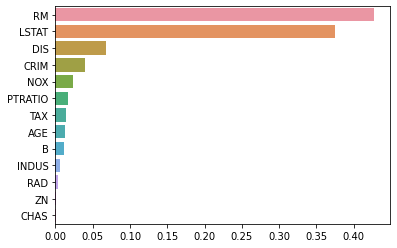

In [ ]:
# 피처별 중요도를 시각화
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)
plt.show()

### 7. 회귀 트리
- 회귀 트리 Regressor가 어떻게 예측값을 판단하는지 선형 회귀와 비교하여 시각화한다.
- 결정 트리의 하이퍼 파라미터인 `max_depth`의 크기를 변화시키면서 **어떻게 회귀 트리 예측선이 변화**하는지 살펴본다. 
- 보스턴 주택 데이터 세트를 이용하며, 2차원 평면상에서 회귀 예측선을 쉽게 표현하기 위하여 단 1개의 변수만 추출한다. 타겟 변수인 Price와 가장 밀접한 양의 상관관계를 가지는 RM 칼럼만 이용하여 선형 회귀와 결정 트리 회귀로 PRICE 예측 회귀선을 표현한다.
- 보스턴 데이터 세트의 개수를 100개만 샘플링하고, RM과 PRICE 칼럼만 추출한다. 좀 더 직관적으로 예측값을 시각화하기 위하여 2차원 평면상에서 X축에 독립 변수인 RM, Y축에 종속 변수인 PRICE를 산점도 형태로 나타낸다.

(100, 2)


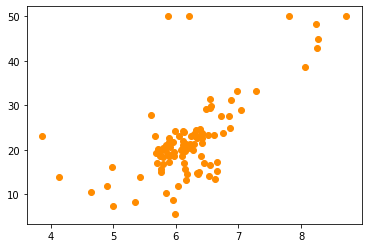

In [ ]:
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)

plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
plt.show()

### 7. 회귀 트리
- 보스턴 데이터 세트에 대해 **`LinearRegression`**과 **`DecisionTreeRegressor`**의 **`max_depth`**을 각각 2와 7로 하여 학습한다.
- 이렇게 학습된 Regressor에 RM 값을 4.5~8.5까지의 100개의 테스트 데이터 세트로 제공했을 때의 예측값을 구한다.
- 학습된 Regressor에서 예측한 Price 회귀선을 그린다.
- 첫번째 그림인 선형 회귀는 예측 회귀선을 직선으로 표현한다. 반면 두번째, 세번째 그림인 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다.
- DecisionTreeRegressor의 max_depth=7인 경우에는 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델이 되었음을 알 수 있다.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 선형 회귀와 결정 트리 기반의 Regressor를 생성하고, 결정 트리의 max_depth을 각각 2와 7로 지정
lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개의 데이터 세트로 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample["RM"].values.reshape(-1, 1)
y_target = bostonDF_sample["PRICE"].values.reshape(-1, 1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
dt_reg2.fit(X_feature, y_target)
dt_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

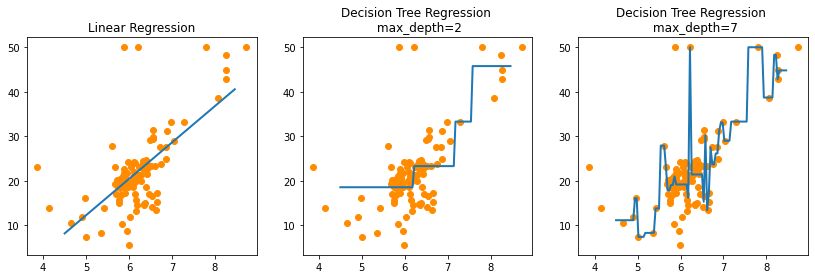

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

# X축 값을 4.5~8.5로 변환하여 입력했을 때, 선형 회귀와 결정 트리 회귀 예측선을 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title("Linear Regression")
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")   # 원래 데이터를 산점도로 그림
ax1.plot(X_test, pred_lr, label="linear", linewidth=2)  # 모델 예측 결과를 직선으로 연결하여 그림

# DecisionTreeRegressor의 max_depth을 2로 했을 때의 모델 회귀 예측선
ax2.set_title("Decision Tree Regression \n max_depth=2")
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")   # 원래 데이터를 산점도로 그림
ax2.plot(X_test, pred_dt2, label="max_depth:2", linewidth=2)   # 모델 예측 결과를 직선으로 연결하여 그림

# DecisionTreeRegressor의 max_depth을 7로 했을 때의 모델 회귀 예측선
ax3.set_title("Decision Tree Regression \n max_depth=7")
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")   # 원래 데이터를 산점도로 그림
ax3.plot(X_test, pred_dt7, label="max_depth:7", linewidth=2)   # 모델 예측 결과를 직선으로 연결하여 그림

plt.show()